Bike Sharing Case Study

Problem Statement: You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features.

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [12]:
import warnings
warnings.filterwarnings('ignore')

Data Understanding and Cleanup

In [13]:
raw_bikes = pd.read_csv('day.csv')
raw_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
raw_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [15]:
raw_bikes.shape

(730, 16)

In [16]:
raw_bikes.info()
#we see no empty or null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [17]:
#Define understandable mappping for Seasons
mapping_s  = {1:'spring',2:'summer',3:'fall', 4:'winter'}
#replace the numeric values with the above mapping
raw_bikes['season'] = raw_bikes['season'].replace(mapping_s)
raw_bikes['season'].value_counts()
#we do not see anything unusual in the data here.

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [18]:
#repeate the same steps for weather situation
mapping_w = {1:'clear',2:'mist',3:'light snow',4:'heavy rain'}
raw_bikes['weathersit'] = raw_bikes['weathersit'].replace(mapping_w)
raw_bikes['weathersit'].value_counts()
#on expected lines we see zero bike usage in Heavy Rain and very little usage in Light Snow


weathersit
clear         463
mist          246
light snow     21
Name: count, dtype: int64

In [19]:
#Check for columns with unique values and data types.
raw_bikes.dtypes.to_frame ('data_type').join (raw_bikes.nunique ().div (len (raw_bikes)).mul (100).to_frame ('unique_percentage')).sort_values(by='unique_percentage',ascending=False)
# Expected low unique values in columns like mnth, weekday, season etc

,data_type,unique_percentage
instant,int64,100.000000
dteday,object,100.000000
cnt,int64,95.205479
atemp,float64,94.383562
registered,int64,92.876712
windspeed,float64,88.904110
casual,int64,82.876712
hum,float64,81.369863
temp,float64,68.219178
mnth,int64,1.643836


In [20]:
#drop 'casual and 'registered' columns as 'cnt' is the targt column that includes those data points
raw_bikes.drop(columns = ['casual','registered'], inplace=True)

In [21]:
# Drop dteday 
# As we have columns for year, month and day of the week, the dteday columns is redundant
raw_bikes.drop(columns = ['dteday'], inplace=True)
raw_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 74.3+ KB


Visualising Numeric Variables

Lets look at piar plot of the nemaric variables

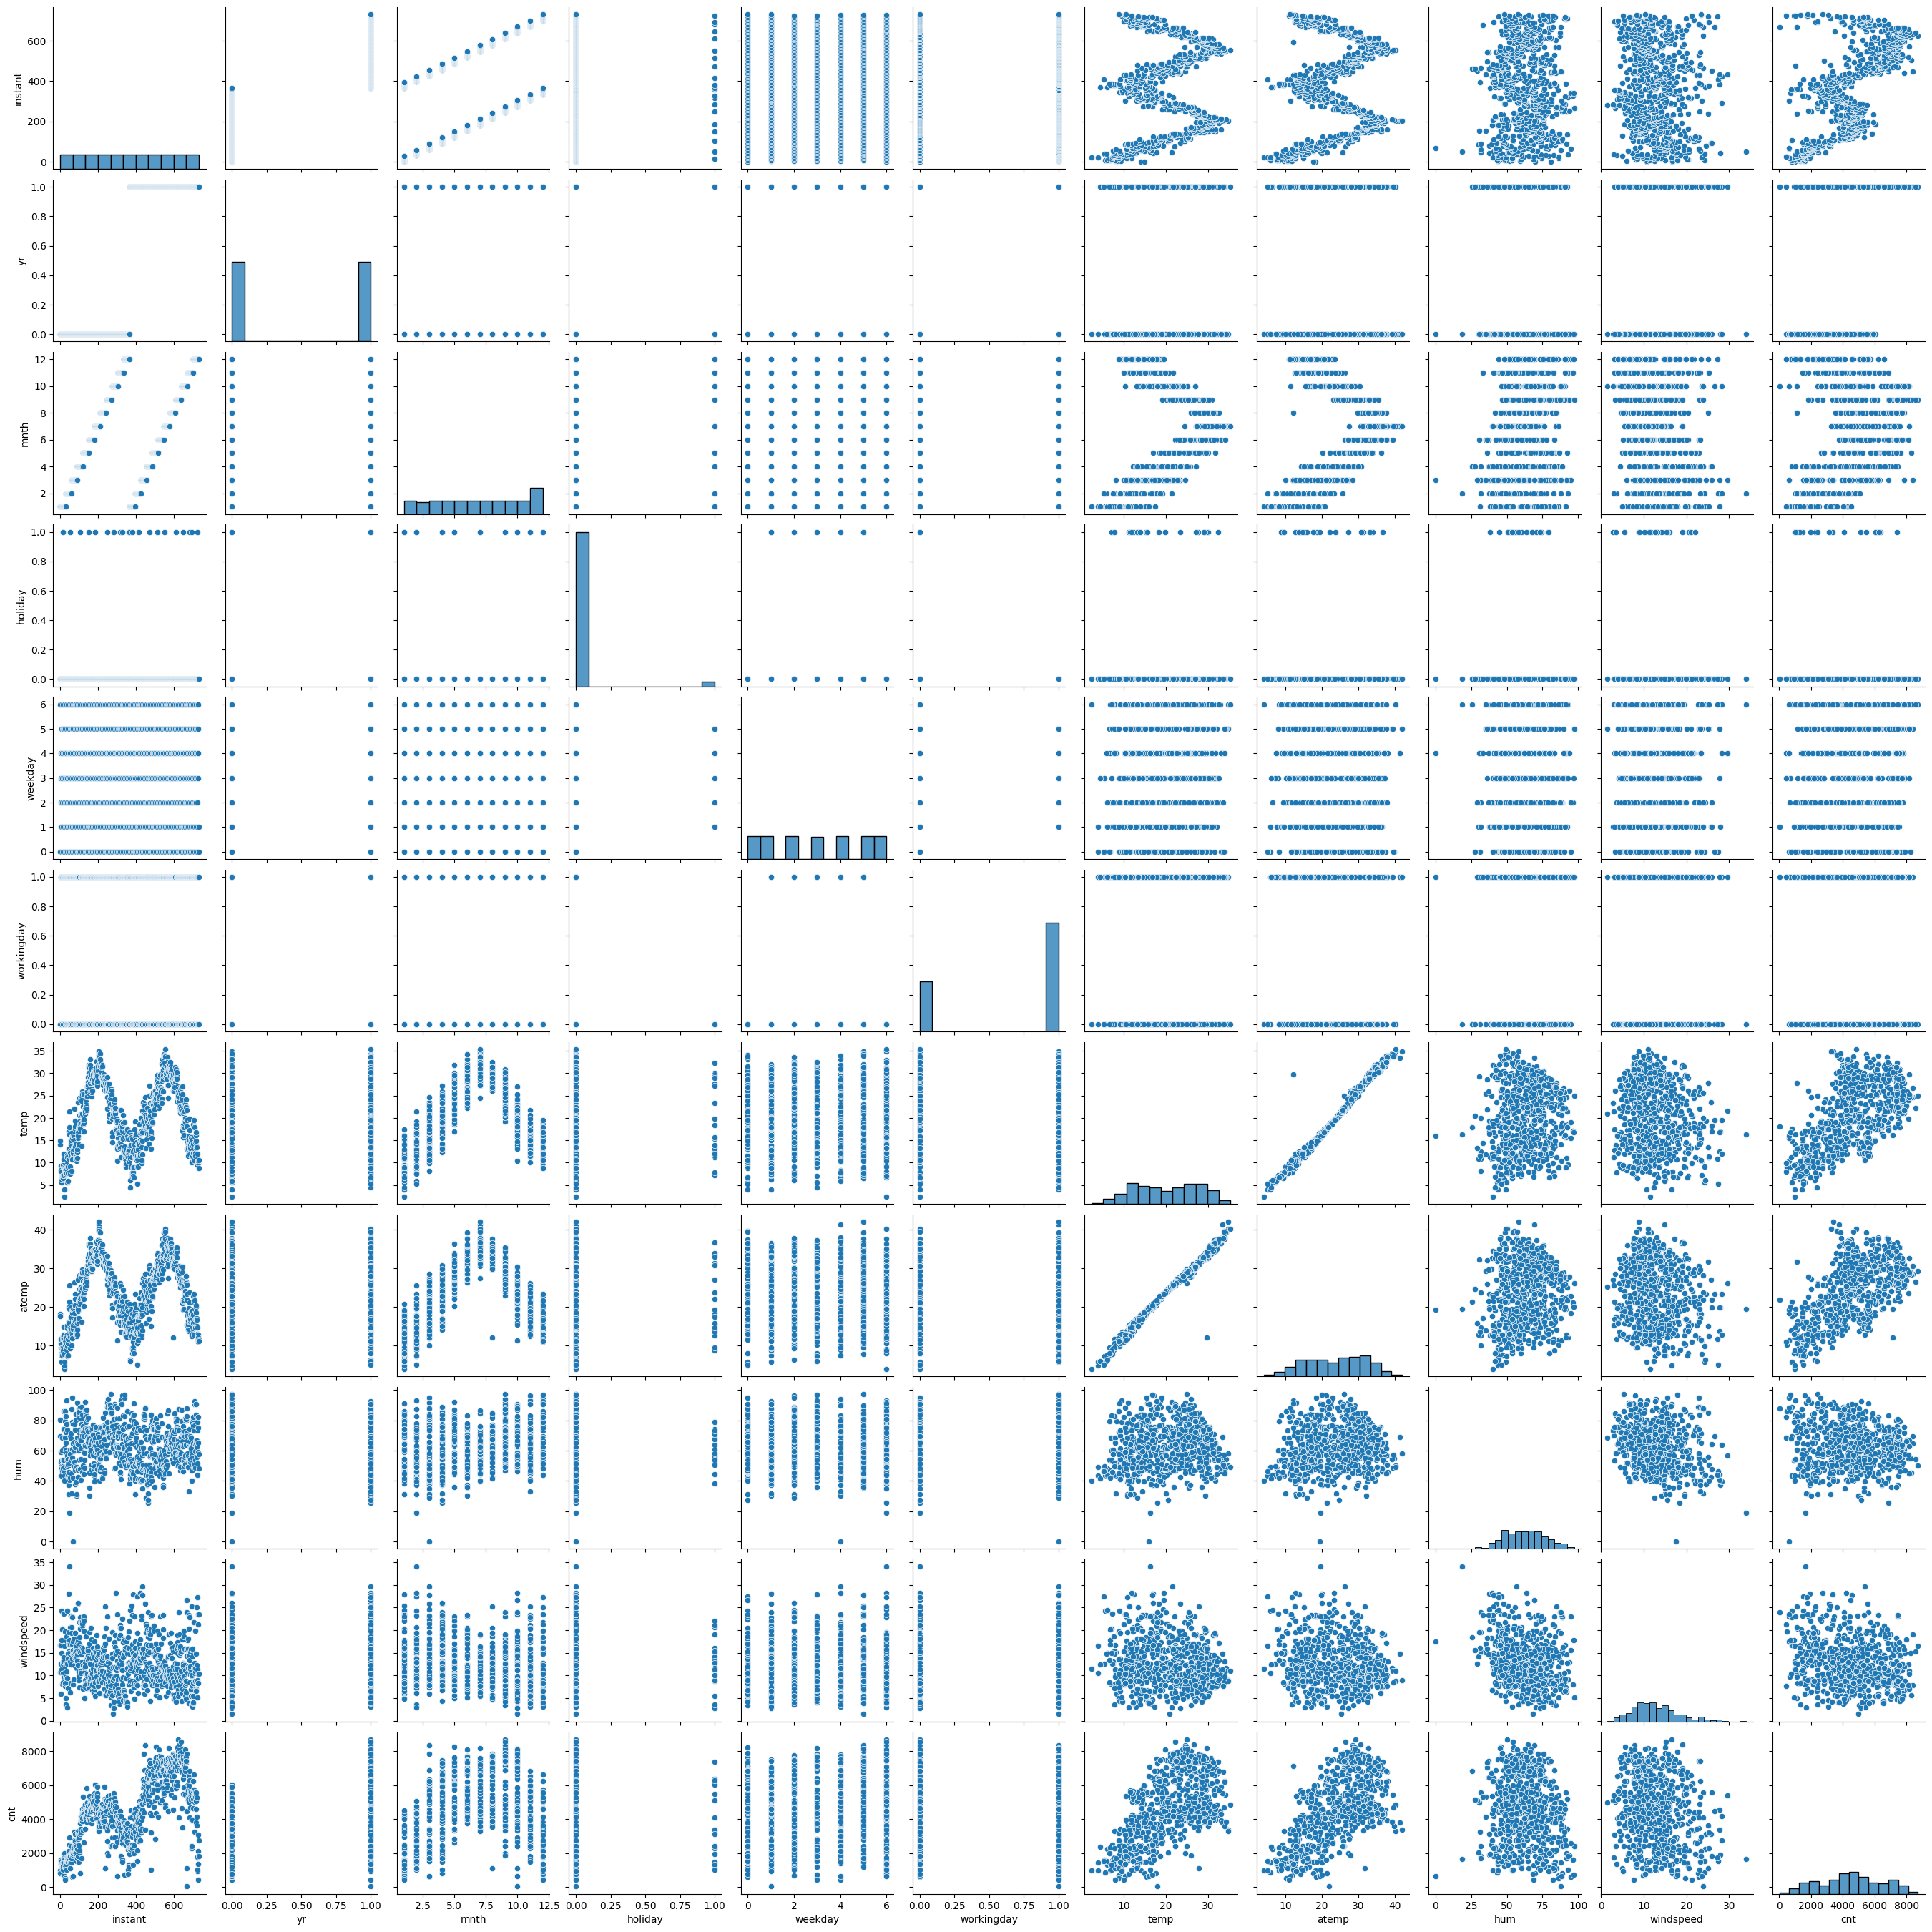

In [22]:
sns.pairplot(raw_bikes)

Observations:
1. temp and atemp have a clear positive correlation with cnt
2. temp and atemp have almost a straight line positive correlation
3. hum and windspeed dont seem to have much correlation with cnt

Visualising Categorical Variables

Let us look at box plots of categorical variables

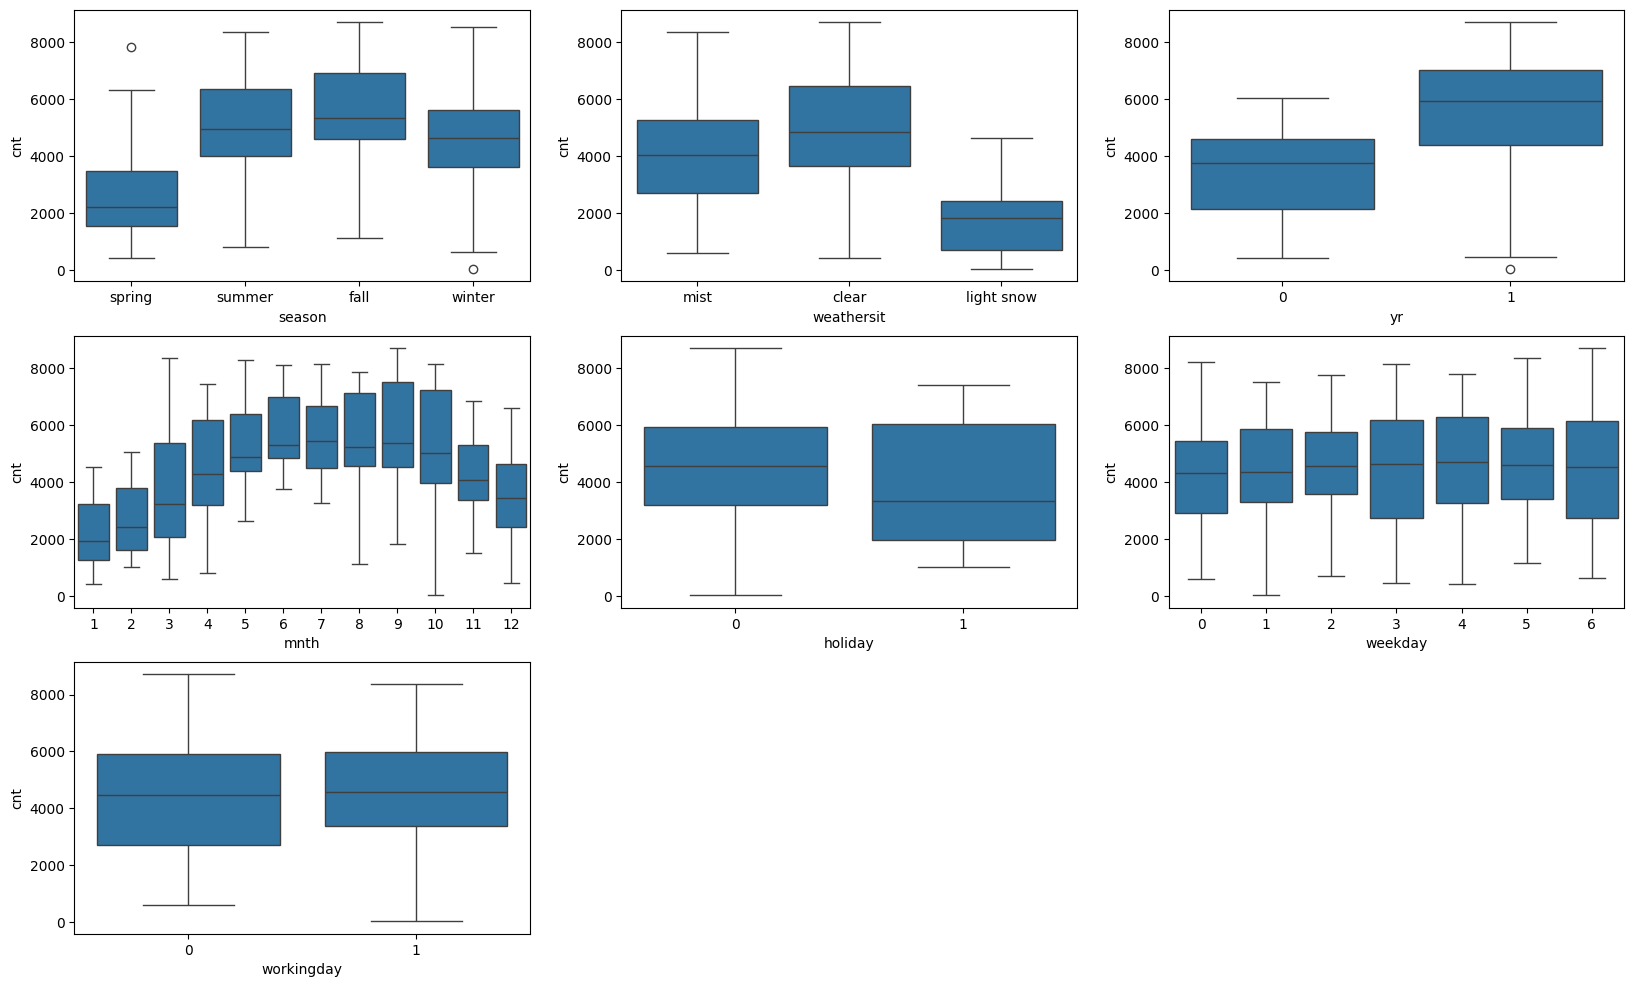

In [23]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = raw_bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = raw_bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = raw_bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = raw_bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = raw_bikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = raw_bikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = raw_bikes)
plt.show()

Observations:
1. fall has the highest bike usage followed by summer while spring has the least usage
2. Clear weather has the highest usage while light snow has negligible usage and zero usage in heavy rain
3. There is a significant increase in usage in year 1 [2019] compared to year 0 [2018]
4. Bike sharing usage is low in winter months and consistently increases till June. Ater that usage remains high till Sept and begins to decline from Oct.
5. Holidays have lower usage though third Quartile has a wider range
6. Across the week, median usage remain consistent, though 

Handle Dummy Variables

In [24]:
# create dummy varibales for Season
seasons_dummy =pd.get_dummies(raw_bikes['season'])
seasons_dummy.head()

,fall,spring,summer,winter
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False


In [25]:
# let us drop the first column as 4 variables can be represented with combinatin of three binary numbers
seasons_dummy =pd.get_dummies(raw_bikes['season'], drop_first=True)
seasons_dummy.head()
# this reduces the number of colums required
# as Fall season would be indicated with all other seasons being False

,spring,summer,winter
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [26]:
# Add the seasons_dummy to the raw_biks dataframe
raw_bikes = pd.concat([raw_bikes, seasons_dummy], axis=1)
raw_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,1,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,985,True,False,False
1,2,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,801,True,False,False
2,3,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349,True,False,False
3,4,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562,True,False,False
4,5,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600,True,False,False


In [27]:
# we can now drop the Season column as we have the dummies 
raw_bikes.drop(['season'], axis=1, inplace=True)
raw_bikes.head()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,1,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,985,True,False,False
1,2,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,801,True,False,False
2,3,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349,True,False,False
3,4,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562,True,False,False
4,5,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600,True,False,False


In [28]:
# Repeate the steps for weathersit
weather_dummy =pd.get_dummies(raw_bikes['weathersit'], drop_first=True)
weather_dummy.head()

,light snow,mist
0,False,True
1,False,True
2,False,False
3,False,False
4,False,False


In [29]:
raw_bikes = pd.concat([raw_bikes,weather_dummy], axis=1)
raw_bikes.head()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
0,1,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,985,True,False,False,False,True
1,2,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,801,True,False,False,False,True
2,3,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,False,False
3,4,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,False,False
4,5,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,False,False


In [30]:
raw_bikes.drop(['weathersit'], axis=1, inplace=True)
raw_bikes.head()
# cols to scale ['mnth','weekday','temp','atemp','hum','windspeed','cnt']

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,True,False,False,False,True
1,2,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,False,False,True
2,3,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,False,False
3,4,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,False,False
4,5,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,False,False


Split Data into Trainig and Test sets 

In [31]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(raw_bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
df_test.shape

(219, 16)

In [33]:
df_train.shape

(510, 16)

Rescaling the Features

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
#we will use Min-Max to rescale as we have catagorical variables and not too many outliers
scaler = MinMaxScaler()

In [36]:
# select columns where it is relevant to apply scaler
cols_to_scale = ['mnth','weekday','temp','atemp','hum','windspeed','cnt']
df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])
df_train.head()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,light snow,mist
653,654,1,0.818182,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,0.864243,False,False,True,False,False
576,577,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,False,False,False
426,427,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,True,False,False,False,True
728,729,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.204096,True,False,False,False,False
482,483,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,True,False,False,True


In [37]:
df_train.describe()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,368.941176,0.507843,0.504456,0.025490,0.498366,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,209.868619,0.500429,0.315338,0.157763,0.336182,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.250000,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,373.000000,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,553.750000,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,729.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


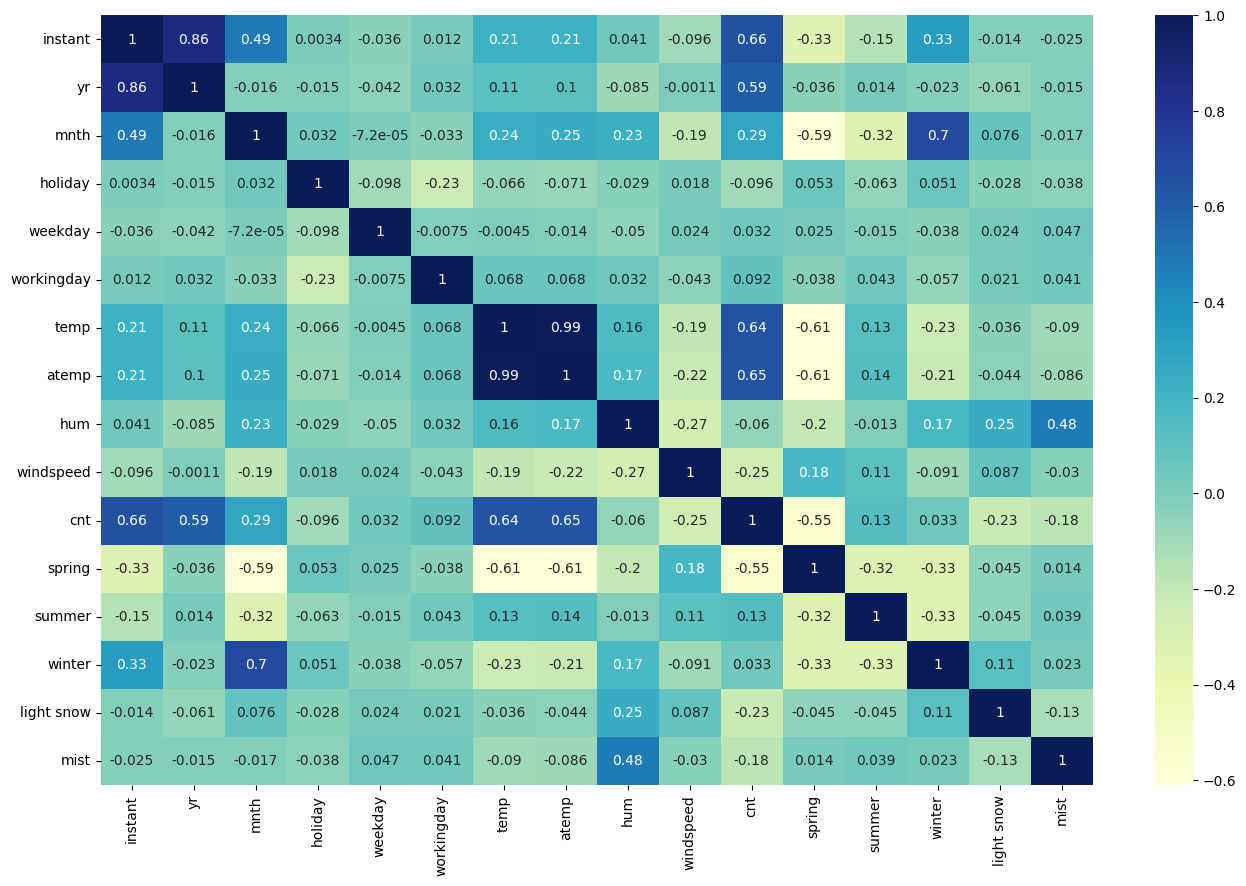

In [38]:
#let us now look at the correlations
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()
#we see a high correlation between temp vs atemp, mnth vs winter and hum vs mist. 
# All these are intutitively obvious 

Dividing train data in X and Y sets for model building

In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

In [40]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [41]:
X_train.drop(columns=['instant'], axis=1, inplace=True)

In [42]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,light snow,mist
653,1,0.818182,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,False,False,True,False,False
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,False,False,False,False,False
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,True,False,False,False,True
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,True,False,False,False,False
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,False,True,False,False,True


RFE - Recursive Feature Elimination

Lets start with automated feature selection to narrow down on the key features. We will use a high numebr of feature to select ie 11 out of 13.

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
# run RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=11)
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 4),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('light snow', True, 1),
 ('mist', True, 1)]

Detailed analysis with Statsmodel

Now we will look at p-vales and VIF to get a seceond level details on the Features selected

In [46]:
# Df with RFE selected columns
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,weekday,temp,atemp,hum,windspeed,spring,winter,light snow,mist
653,1,0,0.333333,0.509887,0.501133,0.575354,0.300794,False,True,False,False
576,1,0,0.333333,0.815169,0.766351,0.725633,0.264686,False,False,False,False
426,1,0,1.000000,0.442393,0.438975,0.640189,0.255342,True,False,False,True
728,1,0,0.000000,0.245101,0.200348,0.498067,0.663106,True,False,False,False
482,1,0,1.000000,0.395666,0.391735,0.504508,0.188475,False,False,False,True


In [47]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [48]:
print(X_train_rfe.dtypes)

const         float64
yr              int64
holiday         int64
weekday       float64
temp          float64
atemp         float64
hum           float64
windspeed     float64
spring           bool
winter           bool
light snow       bool
mist             bool
dtype: object


In [49]:
X_train_rfe.head()

,const,yr,holiday,weekday,temp,atemp,hum,windspeed,spring,winter,light snow,mist
653,1.0,1,0,0.333333,0.509887,0.501133,0.575354,0.300794,False,True,False,False
576,1.0,1,0,0.333333,0.815169,0.766351,0.725633,0.264686,False,False,False,False
426,1.0,1,0,1.000000,0.442393,0.438975,0.640189,0.255342,True,False,False,True
728,1.0,1,0,0.000000,0.245101,0.200348,0.498067,0.663106,True,False,False,False
482,1.0,1,0,1.000000,0.395666,0.391735,0.504508,0.188475,False,False,False,True


In [50]:
#convert types to float as bool variables throw errro in OLS
X_train_rfe = X_train_rfe.astype(float)
X_train_rfe.head()

,const,yr,holiday,weekday,temp,atemp,hum,windspeed,spring,winter,light snow,mist
653,1.0,1.0,0.0,0.333333,0.509887,0.501133,0.575354,0.300794,0.0,1.0,0.0,0.0
576,1.0,1.0,0.0,0.333333,0.815169,0.766351,0.725633,0.264686,0.0,0.0,0.0,0.0
426,1.0,1.0,0.0,1.000000,0.442393,0.438975,0.640189,0.255342,1.0,0.0,0.0,1.0
728,1.0,1.0,0.0,0.000000,0.245101,0.200348,0.498067,0.663106,1.0,0.0,0.0,0.0
482,1.0,1.0,0.0,1.000000,0.395666,0.391735,0.504508,0.188475,0.0,0.0,0.0,1.0


In [51]:
print(y_train.dtypes)

float64


In [52]:
# Run the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [53]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.7
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          4.62e-183
Time:                        09:06:26   Log-Likelihood:                 489.03
No. Observations:                 510   AIC:                            -954.1
Df Residuals:                     498   BIC:                            -903.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3052      0.033      9.202      0.0

atemp has p-value of 0.319. it is insignificant in presense of other values. It can be dropped

In [54]:
X_train_2 = X_train_rfe.drop(['atemp'], axis=1)

Rebuild the model without atemp

In [55]:
X_train_lm = sm.add_constant(X_train_2)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.5
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          4.75e-184
Time:                        09:06:26   Log-Likelihood:                 488.53
No. Observations:                 510   AIC:                            -955.1
Df Residuals:                     499   BIC:                            -908.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3077      0.033      9.302      0.0

In [56]:
#drop the cost column
X_train_2 = X_train_2.drop(['const'], axis=1)

In [57]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,21.75
3,temp,13.37
5,windspeed,4.01
2,weekday,3.09
6,spring,2.58
9,mist,2.23
7,winter,2.10
0,yr,2.05
8,light snow,1.20
1,holiday,1.05


hum has high VIF. we will have to drop and and run the model again

In [58]:
X_train_3 = X_train_2.drop(['hum'], axis=1)
X_train_lm = sm.add_constant(X_train_3)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     263.6
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          1.74e-183
Time:                        09:06:26   Log-Likelihood:                 484.31
No. Observations:                 510   AIC:                            -948.6
Df Residuals:                     500   BIC:                            -906.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2441      0.025      9.822      0.0

all p-values are low. Lets check the VIF values

In [59]:
X_train_3.head()

,yr,holiday,weekday,temp,windspeed,spring,winter,light snow,mist
653,1.0,0.0,0.333333,0.509887,0.300794,0.0,1.0,0.0,0.0
576,1.0,0.0,0.333333,0.815169,0.264686,0.0,0.0,0.0,0.0
426,1.0,0.0,1.000000,0.442393,0.255342,1.0,0.0,0.0,1.0
728,1.0,0.0,0.000000,0.245101,0.663106,1.0,0.0,0.0,0.0
482,1.0,0.0,1.000000,0.395666,0.188475,0.0,0.0,0.0,1.0


In [60]:
vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.35
4,windspeed,3.99
2,weekday,3.06
0,yr,2.05
5,spring,1.76
8,mist,1.51
6,winter,1.41
7,light snow,1.08
1,holiday,1.05


VIF values are all below 5. Notice that VIF for temp got reduced by removing the 'hum' feature

With the final model we have R2 = 0.826 and Adjusted R2 = 0.823 in the Train set.

Residual Analysis - check if the error terms are normally distributed

In [61]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

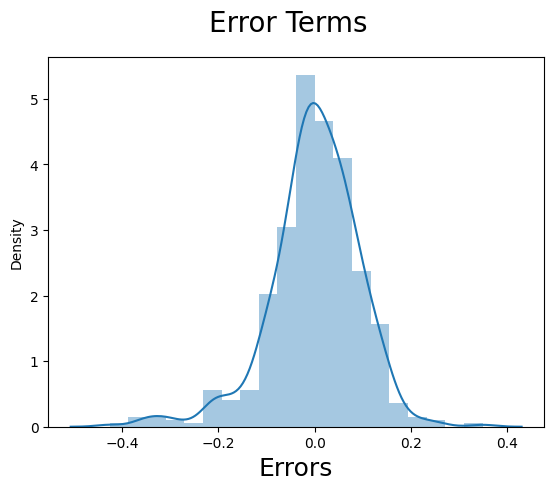

In [62]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Making predictions

Apply scaling on test sets

In [63]:
num_vars = ['mnth','weekday','temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [64]:
y_test = df_test.pop('cnt')
X_test = df_test

In [65]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by selecting only columns from the final train set
X_test_new = X_test[X_train_3.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [66]:
# Making predictions
y_pred = lm.predict(X_test_new)

Model Evaluation

We see an almost linear graph between y_test and y_pred. This means our model is able to predict the test data quite well

Text(0, 0.5, 'y_pred')

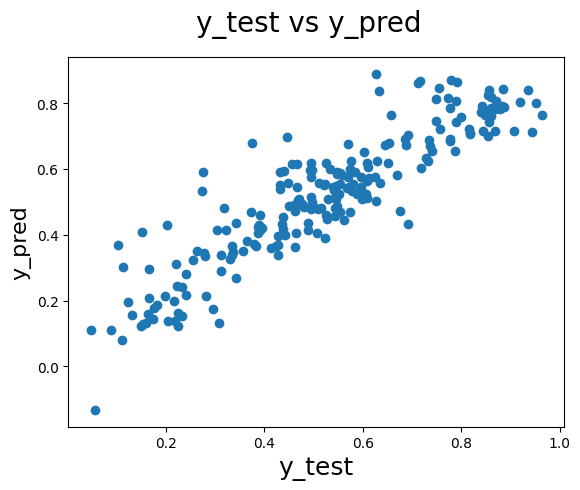

In [67]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

Find R2 for the Test set

In [68]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred)

In [69]:
r2_test

0.8069705711409271

Find the adjusted R2 for test set


In [72]:
# n is number of observations
n = X_test_new.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n - 1) / (n - p - 1))

In [73]:
adjusted_r2_test

0.797690310138087

On Train set:
R2 = 0.826 and Adjusted R2 = 0.823

On Test set:
R2 = 0.807 and Adjusted R2 = 0.798

This means that approximately 80.7% of the variance in the dependent variable can be explained by the independent variables in the model.

Features Impacting Bike usage:
1. Temp - high correlation with rising temperature
2. Windspeed - negative correlation with very high wind speed. no impact at lower wind speeds.
3. Weekday	- consistent usage durign the week days
4. Year - Increased usage in 2019 vs 2018
5. Season  - high usage in Summer and Fall
6. Weather  - No usage in heavy rain and very low in light snow. good usage in clear weather with partly cloudy  and also Mist + Cloudy 


Key feature that impacts the bike usage is temperature and weather. It is evident that usage is high during months with higher temperature and no rain or snow. The company might want to utilise the demand during the months April to Oct by adding more bikes or surge pricing based on demand.  